In [1]:
import Analysis
import cPickle as pickle
reload(Analysis)

A = Analysis.Analysis(tag='P7REP_CLEAN_V15_calore')
A.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A.BinPhotons(infile='binned_photons_'+A.tag+'.npy')
A.AddPointSourceTemplate(fixNorm=True)
A.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A.tag+'.npy',psc_model='PSC_' + A.tag + '.npy',
                        alpha_psc=5., f_psc=0.1)
A.AddIsotropicTemplate(fixNorm=False, fixSpectrum=False) # External chi^2 used to fix normalization within uncertainties

A.AddFermiBubbleTemplate(template_file='./bubble_templates_diskcut30.0.fits', 
                         spec_file='./reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False)
A.AddHDF5Template(hdf5file='base.hdf5',verbosity=1, multiplier=1., bremsfrac=1.25, 
                  E_subsample=1, fixSpectrum=False, separate_ics=False)

A.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.26, 
                r_s=20.0, axesratio=1, offset=(0, 0), spec_file=None,)

A.PrintTemplates()

Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
                NAME                    LIMITS      VALUE    FIXNORM    FIXSPEC   SRCCLASS
                  DM              [None, None]  1.000e+00      False      False        GEN
                 PSC              [None, None]  1.000e+00       True       True        PSC
           Pi0_Brems              [None, None]  1.000e+00      False      False        GEN
           Isotropic              [None, None]  1.000e+00      False      False        ISO
                 ICS              [None, None]  1.000e+00      False      False        GEN
             Bubbles              [None, None]  1.000e+00      False      False        GEN


In [2]:

A2 = Analysis.Analysis(tag='P7REP_CLEAN_V15_calore')
A2.GenSquareMask(l_range=[-20.,20.], b_range=[-20.,20.], plane_mask=2.)
A2.BinPhotons(infile='binned_photons_'+A2.tag+'.npy')
A2.AddPointSourceTemplate(fixNorm=True)
A2.CalculatePixelWeights(diffuse_model='fermi_diffuse_'+A2.tag+'.npy',psc_model='PSC_' + A2.tag + '.npy',
                        alpha_psc=5., f_psc=0.1)
A2.AddIsotropicTemplate(fixNorm=False, fixSpectrum=False) # External chi^2 used to fix normalization within uncertainties

A2.AddFermiBubbleTemplate(template_file='./bubble_templates_diskcut30.0.fits', 
                         spec_file='./reduced_bubble_spec_apj_793_64.dat', fixSpectrum=False)
A2.AddHDF5Template(hdf5file='./mod_f_0.hdf5',verbosity=1, multiplier=1., bremsfrac=1.25, 
                  E_subsample=1, fixSpectrum=False, separate_ics=False)

A2.AddDMTemplate(profile='NFW', limits=[None,None], decay=False, gamma=1.26, 
                r_s=20.0, axesratio=1, offset=(0, 0), spec_file=None,)

A2.PrintTemplates()

Loading HDF5 file
Integrating and Resampling ics templates...
Integrating and Resampling pi0 templates...
Integrating and Resampling brem templates...
                NAME                    LIMITS      VALUE    FIXNORM    FIXSPEC   SRCCLASS
                  DM              [None, None]  1.000e+00      False      False        GEN
                 PSC              [None, None]  1.000e+00       True       True        PSC
           Pi0_Brems              [None, None]  1.000e+00      False      False        GEN
           Isotropic              [None, None]  1.000e+00      False      False        ISO
                 ICS              [None, None]  1.000e+00      False      False        GEN
             Bubbles              [None, None]  1.000e+00      False      False        GEN


In [3]:
junk = A.RunLikelihood( print_level=1, use_basinhopping=False, start_fresh=False, tol=1e2,
                       precision=None, minos=False)

Masking completed in 1.5308e-01 s
Write likelihood tempfile to  /tmp/tmpjJYNTB
Code generation completed in 9.8109e-04 s
Using GPU mode. (Successful import of cudamat module.)


/tmp/tmpjJYNTB:36: RuntimeWarning: invalid value encountered in log
  neg_loglikelihood = np.sum(self.psc_weights*(model-self.data*np.log(model)))
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -556.401650
            PSC = +1.000000
    Pi0_Brems_0 = +0.508900
    Isotropic_0 = -4.562570
          ICS_0 = +0.005883
      Bubbles_0 = -8.486135

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -584.271732
            PSC = +1.000000
    Pi0_Brems_0 = +0.484345
    Isotropic_0 = -4.840699
          ICS_0 = -0.043823
      Bubbles_0 = -8.960442

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_0 = -585.665236
            PSC = +1.000000
    Pi0_Brems_0 = +0.483117
    Isotropic_0 = -4.854605
          ICS_0 = -0.04

FCN = -363219.454207 
 TOTAL NCALL = 101 
 NCALLS = 101 
 
 
 EDM = 0.0002367840286 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_0,2.535128e+01,1.115916e+01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_0,6.452655e-01,5.592864e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_0,4.242448e-01,1.703195e-01,0.000000e+00,0.000000e+00,,,
5,ICS_0,1.076072e+00,3.336324e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_0,-1.295652e-01,2.098640e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.57e-01 s
Masking completed in 1.5043e-01 s
Write likelihood tempfile to  /tmp/tmpsriRci
Code generation completed in 1.1930e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -3.509139
            PSC = +1.000000
    Pi0_Brems_1 = +0.369012
    Isotropic_1 = -7.170142
          ICS_1 = -0.452836
      Bubbles_1 = -12.041032

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -3.734596
            PSC = +1.000000
    Pi0_Brems_1 = +0.337462
    Isotropic_1 = -7.578649
          ICS_1 = -0.525477
      Bubbles_1 = -12.693083

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_1 = -3.745869
            PSC = +1.000000
    Pi0_Brems_1 = +0.335885
    Isotropic_1 = -7.599075
          ICS_1 = -0.529109
      Bubbles_1 = -12.725686

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called wit

FCN = -272749.029921 
 TOTAL NCALL = 142 
 NCALLS = 142 
 
 
 EDM = 0.000464079880461 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_1,1.224958e-01,4.479071e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_1,6.547355e-01,5.803935e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_1,4.560867e-01,1.544666e-01,0.000000e+00,0.000000e+00,,,
5,ICS_1,1.073629e+00,2.961092e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_1,-1.947449e-01,1.765657e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.88e-01 s
Masking completed in 1.5153e-01 s
Write likelihood tempfile to  /tmp/tmpg9rTAa
Code generation completed in 1.1702e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -3.195314
            PSC = +1.000000
    Pi0_Brems_2 = +0.423545
    Isotropic_2 = -6.398202
          ICS_2 = -0.377136
      Bubbles_2 = -10.036618

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -3.405080
            PSC = +1.000000
    Pi0_Brems_2 = +0.394723
    Isotropic_2 = -6.768112
          ICS_2 = -0.445993
      Bubbles_2 = -10.588449

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_2 = -3.415568
            PSC = +1.000000
    Pi0_Brems_2 = +0.393281
    Isotropic_2 = -6.786607
          ICS_2 = -0.449435
      Bubbles_2 = -10.616040

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called wit

FCN = -201847.891642 
 TOTAL NCALL = 109 
 NCALLS = 109 
 
 
 EDM = 0.00335140570534 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_2,1.658774e-01,4.896623e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_2,6.828386e-01,7.682019e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_2,5.515432e-01,1.754489e-01,0.000000e+00,0.000000e+00,,,
5,ICS_2,1.038347e+00,3.631660e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_2,4.685156e-02,1.906667e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.45e-01 s
Masking completed in 1.5047e-01 s
Write likelihood tempfile to  /tmp/tmpXspRUC
Code generation completed in 1.1799e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -10.033177
            PSC = +1.000000
    Pi0_Brems_3 = +0.540921
    Isotropic_3 = -4.655154
          ICS_3 = -0.038855
      Bubbles_3 = -7.175290

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -10.584836
            PSC = +1.000000
    Pi0_Brems_3 = +0.517967
    Isotropic_3 = -4.937912
          ICS_3 = -0.090798
      Bubbles_3 = -7.584055

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_3 = -10.612419
            PSC = +1.000000
    Pi0_Brems_3 = +0.516819
    Isotropic_3 = -4.952050
          ICS_3 = -0.093395
      Bubbles_3 = -7.604493

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called wit

FCN = -148373.172201 
 TOTAL NCALL = 99 
 NCALLS = 99 
 
 
 EDM = 0.000332044195878 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_3,7.664884e-01,2.592141e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_3,6.842080e-01,7.028037e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_3,4.187141e-01,1.689394e-01,0.000000e+00,0.000000e+00,,,
5,ICS_3,1.054676e+00,3.813389e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_3,6.453907e-02,1.933259e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.33e-01 s
Masking completed in 1.4935e-01 s
Write likelihood tempfile to  /tmp/tmpk1aeB9
Code generation completed in 1.1818e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -12.332106
            PSC = +1.000000
    Pi0_Brems_4 = +0.635812
    Isotropic_4 = -3.221359
          ICS_4 = +0.152910
      Bubbles_4 = -5.079821

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -12.998711
            PSC = +1.000000
    Pi0_Brems_4 = +0.617603
    Isotropic_4 = -3.432426
          ICS_4 = +0.110556
      Bubbles_4 = -5.383812

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_4 = -13.032041
            PSC = +1.000000
    Pi0_Brems_4 = +0.616692
    Isotropic_4 = -3.442980
          ICS_4 = +0.108438
      Bubbles_4 = -5.399012

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called wit

FCN = -139774.995404 
 TOTAL NCALL = 99 
 NCALLS = 99 
 
 
 EDM = 9.4211405727e-05 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_4,1.154419e+00,3.914988e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_4,7.318216e-01,7.385221e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_4,7.124441e-01,1.498012e-01,0.000000e+00,0.000000e+00,,,
5,ICS_4,1.040436e+00,3.794786e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_4,-5.518180e-02,1.744455e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.36e-01 s
Masking completed in 1.5072e-01 s
Write likelihood tempfile to  /tmp/tmpO6rlvg
Code generation completed in 1.1852e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -2.089289
            PSC = +1.000000
    Pi0_Brems_5 = +0.374798
    Isotropic_5 = -6.534993
          ICS_5 = -0.666534
      Bubbles_5 = -10.184217

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -2.243754
            PSC = +1.000000
    Pi0_Brems_5 = +0.343538
    Isotropic_5 = -6.911742
          ICS_5 = -0.749861
      Bubbles_5 = -10.743427

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_5 = -2.251477
            PSC = +1.000000
    Pi0_Brems_5 = +0.341975
    Isotropic_5 = -6.930580
          ICS_5 = -0.754027
      Bubbles_5 = -10.771388

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called wit

FCN = -134149.369556 
 TOTAL NCALL = 121 
 NCALLS = 121 
 
 
 EDM = 0.000444598754789 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_5,1.926593e-01,3.151834e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_5,7.185444e-01,8.930800e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_5,6.905433e-01,1.343476e-01,0.000000e+00,0.000000e+00,,,
5,ICS_5,9.563083e-01,4.022563e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_5,1.084235e-01,1.583598e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.61e-01 s
Masking completed in 1.5036e-01 s
Write likelihood tempfile to  /tmp/tmpHvqz1V
Code generation completed in 1.1661e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_6 = -1.806680
            PSC = +1.000000
    Pi0_Brems_6 = +0.425542
    Isotropic_6 = -5.290637
          ICS_6 = -0.561674
      Bubbles_6 = -8.781340

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_6 = -1.947014
            PSC = +1.000000
    Pi0_Brems_6 = +0.396820
    Isotropic_6 = -5.605168
          ICS_6 = -0.639758
      Bubbles_6 = -9.270407

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_6 = -1.954030
            PSC = +1.000000
    Pi0_Brems_6 = +0.395383
    Isotropic_6 = -5.620895
          ICS_6 = -0.643662
      Bubbles_6 = -9.294860

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with f

FCN = -127782.750134 
 TOTAL NCALL = 140 
 NCALLS = 140 
 
 
 EDM = 0.00303359693916 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_6,2.459935e-01,2.901855e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_6,7.539643e-01,7.353768e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_6,8.370164e-01,1.085930e-01,0.000000e+00,0.000000e+00,,,
5,ICS_6,8.855336e-01,3.168389e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_6,2.474740e-01,1.351335e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.86e-01 s
Masking completed in 1.5083e-01 s
Write likelihood tempfile to  /tmp/tmpx_JKtz
Code generation completed in 1.1480e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_7 = -2.030169
            PSC = +1.000000
    Pi0_Brems_7 = +0.460806
    Isotropic_7 = -4.716388
          ICS_7 = -0.440858
      Bubbles_7 = -7.486154

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_7 = -2.181677
            PSC = +1.000000
    Pi0_Brems_7 = +0.433846
    Isotropic_7 = -5.002207
          ICS_7 = -0.512901
      Bubbles_7 = -7.910461

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_7 = -2.189253
            PSC = +1.000000
    Pi0_Brems_7 = +0.432498
    Isotropic_7 = -5.016498
          ICS_7 = -0.516503
      Bubbles_7 = -7.931677

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with f

FCN = -116769.391747 
 TOTAL NCALL = 138 
 NCALLS = 138 
 
 
 EDM = 0.00171428996928 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_7,2.514937e-01,3.505537e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_7,7.522554e-01,7.470341e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_7,8.566764e-01,1.047553e-01,0.000000e+00,0.000000e+00,,,
5,ICS_7,8.921685e-01,3.127747e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_7,3.105090e-01,1.264542e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.84e-01 s
Masking completed in 1.4987e-01 s
Write likelihood tempfile to  /tmp/tmpfxTnJ3
Code generation completed in 1.1361e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_8 = -1.622574
            PSC = +1.000000
    Pi0_Brems_8 = +0.441851
    Isotropic_8 = -4.942011
          ICS_8 = -0.530823
      Bubbles_8 = -7.755253

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_8 = -1.753702
            PSC = +1.000000
    Pi0_Brems_8 = +0.413943
    Isotropic_8 = -5.239111
          ICS_8 = -0.607364
      Bubbles_8 = -8.193015

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_8 = -1.760259
            PSC = +1.000000
    Pi0_Brems_8 = +0.412548
    Isotropic_8 = -5.253966
          ICS_8 = -0.611191
      Bubbles_8 = -8.214903

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with f

FCN = -106121.879144 
 TOTAL NCALL = 138 
 NCALLS = 138 
 
 
 EDM = 0.00257571807791 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_8,2.808568e-01,2.830767e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_8,7.714032e-01,7.736306e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_8,8.411988e-01,1.033991e-01,0.000000e+00,0.000000e+00,,,
5,ICS_8,8.581692e-01,3.138236e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_8,3.018514e-01,1.226414e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.85e-01 s
Masking completed in 1.4833e-01 s
Write likelihood tempfile to  /tmp/tmpkDYgq0
Code generation completed in 1.1292e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_9 = -1.525457
            PSC = +1.000000
    Pi0_Brems_9 = +0.487738
    Isotropic_9 = -4.271686
          ICS_9 = -0.355143
      Bubbles_9 = -6.853281

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_9 = -1.651729
            PSC = +1.000000
    Pi0_Brems_9 = +0.462125
    Isotropic_9 = -4.535270
          ICS_9 = -0.422900
      Bubbles_9 = -7.245945

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_9 = -1.658043
            PSC = +1.000000
    Pi0_Brems_9 = +0.460844
    Isotropic_9 = -4.548449
          ICS_9 = -0.426288
      Bubbles_9 = -7.265578

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with f

FCN = -94109.7597367 
 TOTAL NCALL = 138 
 NCALLS = 138 
 
 
 EDM = 0.00159485245276 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_9,3.055717e-01,3.159929e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_9,7.670723e-01,8.058508e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_9,8.592858e-01,1.030871e-01,0.000000e+00,0.000000e+00,,,
5,ICS_9,9.102571e-01,3.145037e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_9,3.195175e-01,1.257503e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.85e-01 s
Masking completed in 1.4969e-01 s
Write likelihood tempfile to  /tmp/tmpjgvDVA
Code generation completed in 1.2040e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -1.095951
             PSC = +1.000000
    Pi0_Brems_10 = +0.541248
    Isotropic_10 = -3.669229
          ICS_10 = -0.208223
      Bubbles_10 = -5.399873

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -1.200748
             PSC = +1.000000
    Pi0_Brems_10 = +0.518310
    Isotropic_10 = -3.902690
          ICS_10 = -0.268634
      Bubbles_10 = -5.719867

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_10 = -1.205988
             PSC = +1.000000
    Pi0_Brems_10 = +0.517163
    Isotropic_10 = -3.914363
          ICS_10 = -0.271654
      Bubbles_10 = -5.735867

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fc

FCN = -78738.7922228 
 TOTAL NCALL = 103 
 NCALLS = 103 
 
 
 EDM = 0.00266147287105 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_10,3.279212e-01,2.907985e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_10,8.166491e-01,1.065040e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_10,1.026876e+00,1.098165e-01,0.000000e+00,0.000000e+00,,,
5,ICS_10,8.600806e-01,3.827570e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_10,4.371499e-01,1.309704e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.41e-01 s
Masking completed in 1.5451e-01 s
Write likelihood tempfile to  /tmp/tmpoiM3ll
Code generation completed in 1.1590e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -1.117260
             PSC = +1.000000
    Pi0_Brems_11 = +0.500243
    Isotropic_11 = -4.088662
          ICS_11 = -0.279361
      Bubbles_11 = -5.850643

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -1.223123
             PSC = +1.000000
    Pi0_Brems_11 = +0.475256
    Isotropic_11 = -4.343095
          ICS_11 = -0.343329
      Bubbles_11 = -6.193176

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_11 = -1.228416
             PSC = +1.000000
    Pi0_Brems_11 = +0.474006
    Isotropic_11 = -4.355817
          ICS_11 = -0.346527
      Bubbles_11 = -6.210302

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fc

FCN = -62019.8201449 
 TOTAL NCALL = 134 
 NCALLS = 134 
 
 
 EDM = 0.00176595630951 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_11,3.581691e-01,2.785887e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_11,8.067587e-01,9.152640e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_11,9.682981e-01,1.118890e-01,0.000000e+00,0.000000e+00,,,
5,ICS_11,8.281878e-01,3.186684e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_11,5.049409e-01,1.191587e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.81e-01 s
Masking completed in 1.5000e-01 s
Write likelihood tempfile to  /tmp/tmpLdBDbB
Code generation completed in 1.1249e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -0.562067
             PSC = +1.000000
    Pi0_Brems_12 = +0.680923
    Isotropic_12 = -2.329283
          ICS_12 = +0.217480
      Bubbles_12 = -2.845580

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -0.640170
             PSC = +1.000000
    Pi0_Brems_12 = +0.664969
    Isotropic_12 = -2.495747
          ICS_12 = +0.178354
      Bubbles_12 = -3.037859

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_12 = -0.644075
             PSC = +1.000000
    Pi0_Brems_12 = +0.664172
    Isotropic_12 = -2.504070
          ICS_12 = +0.176398
      Bubbles_12 = -3.047473

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fc

FCN = -50723.7900348 
 TOTAL NCALL = 99 
 NCALLS = 99 
 
 
 EDM = 0.00063963188312 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_12,4.341792e-01,3.583369e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_12,8.804328e-01,1.220432e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_12,1.037289e+00,1.212861e-01,0.000000e+00,0.000000e+00,,,
5,ICS_12,8.753181e-01,3.851611e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_12,5.815274e-01,1.239380e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.38e-01 s
Masking completed in 1.4983e-01 s
Write likelihood tempfile to  /tmp/tmpXFA8cu
Code generation completed in 1.1449e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.224627
             PSC = +1.000000
    Pi0_Brems_13 = +0.702372
    Isotropic_13 = -2.039497
          ICS_13 = +0.286070
      Bubbles_13 = -2.129455

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.285858
             PSC = +1.000000
    Pi0_Brems_13 = +0.687491
    Isotropic_13 = -2.191472
          ICS_13 = +0.250373
      Bubbles_13 = -2.285928

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_13 = -0.288919
             PSC = +1.000000
    Pi0_Brems_13 = +0.686747
    Isotropic_13 = -2.199071
          ICS_13 = +0.248589
      Bubbles_13 = -2.293752

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fc

FCN = -34591.5943304 
 TOTAL NCALL = 99 
 NCALLS = 99 
 
 
 EDM = 0.00024654955607 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_13,4.507670e-01,2.962853e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_13,9.331831e-01,1.284460e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_13,9.526850e-01,1.265528e-01,0.000000e+00,0.000000e+00,,,
5,ICS_13,8.226830e-01,3.747748e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_13,9.085337e-01,1.195763e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.39e-01 s
Masking completed in 1.4984e-01 s
Write likelihood tempfile to  /tmp/tmpJnsLEC
Code generation completed in 1.1342e-03 s
Using GPU mode. (Successful import of cudamat module.)


GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.301120
             PSC = +1.000000
    Pi0_Brems_14 = +0.712513
    Isotropic_14 = -1.517674
          ICS_14 = +0.351730
      Bubbles_14 = -1.728994

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.366176
             PSC = +1.000000
    Pi0_Brems_14 = +0.698139
    Isotropic_14 = -1.643557
          ICS_14 = +0.319317
      Bubbles_14 = -1.865443

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fcn is called with following arguments:
           DM_14 = -0.369429
             PSC = +1.000000
    Pi0_Brems_14 = +0.697420
    Isotropic_14 = -1.649851
          ICS_14 = +0.317696
      Bubbles_14 = -1.872266

  m.migrad(ncall=5e4, precision=precision)
GammaLikelihood.py:510: RuntimeWarning: fcn returns Nan
fc

FCN = -17123.4324341 
 TOTAL NCALL = 99 
 NCALLS = 99 
 
 
 EDM = 0.000287073038612 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_14,5.152931e-01,3.751789e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_14,9.448612e-01,1.442751e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_14,9.278823e-01,1.130673e-01,0.000000e+00,0.000000e+00,,,
5,ICS_14,7.978382e-01,3.803138e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_14,6.595950e-01,1.065803e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.39e-01 s
Masking completed in 1.5003e-01 s
Write likelihood tempfile to  /tmp/tmpCe_OIJ
Code generation completed in 1.1480e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -1372.00627561 
 TOTAL NCALL = 133 
 NCALLS = 133 
 
 
 EDM = 3.04775279985e-09 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_15,5.408043e-01,4.053569e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_15,9.432698e-01,1.512057e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_15,9.724420e-01,1.073820e-01,0.000000e+00,0.000000e+00,,,
5,ICS_15,8.109311e-01,3.589952e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_15,7.673425e-01,9.173002e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.85e-01 s
Masking completed in 1.4807e-01 s
Write likelihood tempfile to  /tmp/tmpnKvpHx
Code generation completed in 2.6031e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 10096.7538761 
 TOTAL NCALL = 120 
 NCALLS = 120 
 
 
 EDM = 0.00367568262896 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_16,6.276387e-01,4.559239e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_16,9.737728e-01,1.814080e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_16,9.786680e-01,1.240681e-01,0.000000e+00,0.000000e+00,,,
5,ICS_16,7.691433e-01,3.837917e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_16,8.572433e-01,9.953884e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.67e-01 s
Masking completed in 1.4835e-01 s
Write likelihood tempfile to  /tmp/tmpC0Po5O
Code generation completed in 1.1539e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 17769.7568321 
 TOTAL NCALL = 108 
 NCALLS = 108 
 
 
 EDM = 0.00225051780412 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_17,7.437101e-01,5.798045e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_17,9.990775e-01,2.236715e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_17,1.074615e+00,1.465542e-01,0.000000e+00,0.000000e+00,,,
5,ICS_17,7.651221e-01,4.155892e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_17,8.989311e-01,9.994008e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.50e-01 s
Masking completed in 1.5020e-01 s
Write likelihood tempfile to  /tmp/tmpjtAW0J
Code generation completed in 1.1611e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 21005.3126785 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.000350782862283 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_18,8.854317e-01,1.106331e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_18,1.100730e+00,2.940641e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_18,1.035191e+00,1.493481e-01,0.000000e+00,0.000000e+00,,,
5,ICS_18,7.534204e-01,4.670000e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_18,8.626909e-01,8.489017e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.71e-01 s
Masking completed in 1.4806e-01 s
Write likelihood tempfile to  /tmp/tmpFQ1GlI
Code generation completed in 1.1630e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 20631.0514455 
 TOTAL NCALL = 123 
 NCALLS = 123 
 
 
 EDM = 0.00149260562347 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_19,9.791488e-01,1.077302e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_19,1.127359e+00,3.915504e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_19,1.010597e+00,1.304390e-01,0.000000e+00,0.000000e+00,,,
5,ICS_19,6.560053e-01,5.279340e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_19,7.648176e-01,7.429239e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.71e-01 s
Masking completed in 1.4817e-01 s
Write likelihood tempfile to  /tmp/tmp_zBgI0
Code generation completed in 1.1740e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 17791.7173745 
 TOTAL NCALL = 111 
 NCALLS = 111 
 
 
 EDM = 0.000915562453908 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_20,1.425516e+00,2.907548e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_20,1.207831e+00,5.820277e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_20,9.435735e-01,1.264064e-01,0.000000e+00,0.000000e+00,,,
5,ICS_20,7.907679e-01,6.570161e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_20,8.685166e-01,7.505148e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.55e-01 s
Masking completed in 1.4763e-01 s
Write likelihood tempfile to  /tmp/tmphVsNo7
Code generation completed in 1.1520e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 13369.3774779 
 TOTAL NCALL = 127 
 NCALLS = 127 
 
 
 EDM = 5.43031009197e-06 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_21,1.728078e+00,3.460460e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_21,1.173472e+00,8.549769e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_21,9.932016e-01,1.195761e-01,0.000000e+00,0.000000e+00,,,
5,ICS_21,7.869803e-01,8.280068e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_21,9.291980e-01,7.781424e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.78e-01 s
Masking completed in 1.4788e-01 s
Write likelihood tempfile to  /tmp/tmpm0UazE
Code generation completed in 1.1480e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 8024.00922092 
 TOTAL NCALL = 122 
 NCALLS = 122 
 
 
 EDM = 0.00276901269597 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_22,2.916613e+00,8.089349e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_22,1.777254e+00,1.694380e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_22,9.328589e-01,1.238017e-01,0.000000e+00,0.000000e+00,,,
5,ICS_22,7.027057e-01,1.388486e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_22,7.532179e-01,7.957944e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.70e-01 s
Masking completed in 1.4858e-01 s
Write likelihood tempfile to  /tmp/tmp5R4ZPq
Code generation completed in 1.1139e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 2963.55574161 
 TOTAL NCALL = 152 
 NCALLS = 152 
 
 
 EDM = 5.83402829857e-05 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_23,9.832137e+01,1.814654e+02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_23,1.816967e+00,5.581576e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_23,9.742032e-01,2.205366e-01,0.000000e+00,0.000000e+00,,,
5,ICS_23,2.628294e+00,4.936141e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_23,8.871104e-01,1.352393e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.10e-01 s


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_0,2.535128e+01,9.077308e+00,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_0,6.452655e-01,5.363453e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_0,4.242448e-01,1.472843e-01,0.000000e+00,0.000000e+00,,,
5,ICS_0,1.076072e+00,2.814842e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_0,-1.295652e-01,1.835258e-01,0.000000e+00,0.000000e+00,,,


+,DM_0,Pi0_Brems_0,Isotropic_0,ICS_0,Bubbles_0
DM_0,1.00,0.16,0.41,-0.64,-0.35
Pi0_Brems_0,0.16,1.00,0.20,-0.63,0.04
Isotropic_0,0.41,0.20,1.00,-0.72,-0.72
ICS_0,-0.64,-0.63,-0.72,1.00,0.28
Bubbles_0,-0.35,0.04,-0.72,0.28,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_1,1.224958e-01,4.479096e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_1,6.547355e-01,5.803945e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_1,4.560867e-01,1.544660e-01,0.000000e+00,0.000000e+00,,,
5,ICS_1,1.073629e+00,2.961107e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_1,-1.947449e-01,1.765646e-01,0.000000e+00,0.000000e+00,,,


+,DM_1,Pi0_Brems_1,Isotropic_1,ICS_1,Bubbles_1
DM_1,1.00,0.16,0.39,-0.63,-0.33
Pi0_Brems_1,0.16,1.00,0.19,-0.64,0.04
Isotropic_1,0.39,0.19,1.00,-0.71,-0.70
ICS_1,-0.63,-0.64,-0.71,1.00,0.25
Bubbles_1,-0.33,0.04,-0.70,0.25,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_2,1.658774e-01,4.815095e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_2,6.828386e-01,6.383635e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_2,5.515432e-01,1.558408e-01,0.000000e+00,0.000000e+00,,,
5,ICS_2,1.038347e+00,3.184727e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_2,4.685156e-02,1.707404e-01,0.000000e+00,0.000000e+00,,,


+,DM_2,Pi0_Brems_2,Isotropic_2,ICS_2,Bubbles_2
DM_2,1.00,0.14,0.36,-0.61,-0.30
Pi0_Brems_2,0.14,1.00,0.18,-0.65,0.05
Isotropic_2,0.36,0.18,1.00,-0.68,-0.67
ICS_2,-0.61,-0.65,-0.68,1.00,0.20
Bubbles_2,-0.30,0.05,-0.67,0.20,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_3,7.664884e-01,2.085567e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_3,6.842080e-01,6.870043e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_3,4.187141e-01,1.542716e-01,0.000000e+00,0.000000e+00,,,
5,ICS_3,1.054676e+00,3.318659e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_3,6.453907e-02,1.732362e-01,0.000000e+00,0.000000e+00,,,


+,DM_3,Pi0_Brems_3,Isotropic_3,ICS_3,Bubbles_3
DM_3,1.00,0.14,0.32,-0.60,-0.26
Pi0_Brems_3,0.14,1.00,0.17,-0.66,0.07
Isotropic_3,0.32,0.17,1.00,-0.65,-0.63
ICS_3,-0.60,-0.66,-0.65,1.00,0.13
Bubbles_3,-0.26,0.07,-0.63,0.13,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_4,1.154419e+00,3.297822e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_4,7.318216e-01,7.206793e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_4,7.124441e-01,1.407875e-01,0.000000e+00,0.000000e+00,,,
5,ICS_4,1.040436e+00,3.404046e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_4,-5.518180e-02,1.588767e-01,0.000000e+00,0.000000e+00,,,


+,DM_4,Pi0_Brems_4,Isotropic_4,ICS_4,Bubbles_4
DM_4,1.00,0.12,0.29,-0.58,-0.23
Pi0_Brems_4,0.12,1.00,0.16,-0.67,0.08
Isotropic_4,0.29,0.16,1.00,-0.62,-0.60
ICS_4,-0.58,-0.67,-0.62,1.00,0.08
Bubbles_4,-0.23,0.08,-0.60,0.08,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_5,1.926593e-01,2.953073e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_5,7.185444e-01,7.101655e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_5,6.905433e-01,1.246989e-01,0.000000e+00,0.000000e+00,,,
5,ICS_5,9.563083e-01,3.200715e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_5,1.084235e-01,1.445710e-01,0.000000e+00,0.000000e+00,,,


+,DM_5,Pi0_Brems_5,Isotropic_5,ICS_5,Bubbles_5
DM_5,1.00,0.11,0.26,-0.57,-0.21
Pi0_Brems_5,0.11,1.00,0.14,-0.68,0.10
Isotropic_5,0.26,0.14,1.00,-0.57,-0.56
ICS_5,-0.57,-0.68,-0.57,1.00,0.01
Bubbles_5,-0.21,0.10,-0.56,0.01,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_6,2.459935e-01,2.901859e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_6,7.539643e-01,7.353781e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_6,8.370164e-01,1.085925e-01,0.000000e+00,0.000000e+00,,,
5,ICS_6,8.855336e-01,3.168392e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_6,2.474740e-01,1.351329e-01,0.000000e+00,0.000000e+00,,,


+,DM_6,Pi0_Brems_6,Isotropic_6,ICS_6,Bubbles_6
DM_6,1.00,0.10,0.23,-0.55,-0.18
Pi0_Brems_6,0.10,1.00,0.13,-0.69,0.11
Isotropic_6,0.23,0.13,1.00,-0.53,-0.51
ICS_6,-0.55,-0.69,-0.53,1.00,-0.06
Bubbles_6,-0.18,0.11,-0.51,-0.06,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_7,2.514937e-01,3.505520e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_7,7.522554e-01,7.470289e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_7,8.566764e-01,1.047543e-01,0.000000e+00,0.000000e+00,,,
5,ICS_7,8.921685e-01,3.127706e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_7,3.105090e-01,1.264534e-01,0.000000e+00,0.000000e+00,,,


+,DM_7,Pi0_Brems_7,Isotropic_7,ICS_7,Bubbles_7
DM_7,1.00,0.09,0.21,-0.54,-0.17
Pi0_Brems_7,0.09,1.00,0.11,-0.70,0.12
Isotropic_7,0.21,0.11,1.00,-0.49,-0.49
ICS_7,-0.54,-0.70,-0.49,1.00,-0.10
Bubbles_7,-0.17,0.12,-0.49,-0.10,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_8,2.808568e-01,2.830766e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_8,7.714032e-01,7.736305e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_8,8.411988e-01,1.033986e-01,0.000000e+00,0.000000e+00,,,
5,ICS_8,8.581692e-01,3.138229e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_8,3.018514e-01,1.226409e-01,0.000000e+00,0.000000e+00,,,


+,DM_8,Pi0_Brems_8,Isotropic_8,ICS_8,Bubbles_8
DM_8,1.00,0.08,0.19,-0.53,-0.16
Pi0_Brems_8,0.08,1.00,0.10,-0.70,0.12
Isotropic_8,0.19,0.10,1.00,-0.47,-0.46
ICS_8,-0.53,-0.70,-0.47,1.00,-0.12
Bubbles_8,-0.16,0.12,-0.46,-0.12,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_9,3.055717e-01,3.159914e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_9,7.670723e-01,8.058444e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_9,8.592858e-01,1.030864e-01,0.000000e+00,0.000000e+00,,,
5,ICS_9,9.102571e-01,3.144996e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_9,3.195175e-01,1.257496e-01,0.000000e+00,0.000000e+00,,,


+,DM_9,Pi0_Brems_9,Isotropic_9,ICS_9,Bubbles_9
DM_9,1.00,0.07,0.17,-0.52,-0.15
Pi0_Brems_9,0.07,1.00,0.09,-0.71,0.12
Isotropic_9,0.17,0.09,1.00,-0.44,-0.43
ICS_9,-0.52,-0.71,-0.44,1.00,-0.15
Bubbles_9,-0.15,0.12,-0.43,-0.15,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_10,3.279212e-01,2.900637e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_10,8.166491e-01,8.765650e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_10,1.026876e+00,1.069967e-01,0.000000e+00,0.000000e+00,,,
5,ICS_10,8.600806e-01,3.211806e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_10,4.371499e-01,1.171816e-01,0.000000e+00,0.000000e+00,,,


+,DM_10,Pi0_Brems_10,Isotropic_10,ICS_10,Bubbles_10
DM_10,1.00,0.05,0.17,-0.50,-0.14
Pi0_Brems_10,0.05,1.00,0.09,-0.71,0.12
Isotropic_10,0.17,0.09,1.00,-0.41,-0.43
ICS_10,-0.50,-0.71,-0.41,1.00,-0.18
Bubbles_10,-0.14,0.12,-0.43,-0.18,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_11,3.581691e-01,2.785879e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_11,8.067587e-01,9.152593e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_11,9.682981e-01,1.118885e-01,0.000000e+00,0.000000e+00,,,
5,ICS_11,8.281878e-01,3.186655e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_11,5.049409e-01,1.191582e-01,0.000000e+00,0.000000e+00,,,


+,DM_11,Pi0_Brems_11,Isotropic_11,ICS_11,Bubbles_11
DM_11,1.00,0.04,0.15,-0.49,-0.13
Pi0_Brems_11,0.04,1.00,0.08,-0.72,0.13
Isotropic_11,0.15,0.08,1.00,-0.38,-0.41
ICS_11,-0.49,-0.72,-0.38,1.00,-0.21
Bubbles_11,-0.13,0.13,-0.41,-0.21,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_12,4.341792e-01,3.574822e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_12,8.804328e-01,1.039882e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_12,1.037289e+00,1.194274e-01,0.000000e+00,0.000000e+00,,,
5,ICS_12,8.753181e-01,3.370862e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_12,5.815274e-01,1.117888e-01,0.000000e+00,0.000000e+00,,,


+,DM_12,Pi0_Brems_12,Isotropic_12,ICS_12,Bubbles_12
DM_12,1.00,0.03,0.14,-0.48,-0.13
Pi0_Brems_12,0.03,1.00,0.07,-0.73,0.13
Isotropic_12,0.14,0.07,1.00,-0.36,-0.40
ICS_12,-0.48,-0.73,-0.36,1.00,-0.22
Bubbles_12,-0.13,0.13,-0.40,-0.22,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_13,4.507670e-01,2.982830e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_13,9.331831e-01,1.182924e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_13,9.526850e-01,1.248276e-01,0.000000e+00,0.000000e+00,,,
5,ICS_13,8.226830e-01,3.474148e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_13,9.085337e-01,1.076015e-01,0.000000e+00,0.000000e+00,,,


+,DM_13,Pi0_Brems_13,Isotropic_13,ICS_13,Bubbles_13
DM_13,1.00,0.02,0.13,-0.46,-0.12
Pi0_Brems_13,0.02,1.00,0.07,-0.73,0.12
Isotropic_13,0.13,0.07,1.00,-0.35,-0.38
ICS_13,-0.46,-0.73,-0.35,1.00,-0.23
Bubbles_13,-0.12,0.12,-0.38,-0.23,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_14,5.152931e-01,3.742734e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_14,9.448612e-01,1.299173e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_14,9.278823e-01,1.119085e-01,0.000000e+00,0.000000e+00,,,
5,ICS_14,7.978382e-01,3.456651e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_14,6.595950e-01,9.589177e-02,0.000000e+00,0.000000e+00,,,


+,DM_14,Pi0_Brems_14,Isotropic_14,ICS_14,Bubbles_14
DM_14,1.00,0.01,0.11,-0.44,-0.11
Pi0_Brems_14,0.01,1.00,0.06,-0.74,0.13
Isotropic_14,0.11,0.06,1.00,-0.30,-0.34
ICS_14,-0.44,-0.74,-0.30,1.00,-0.28
Bubbles_14,-0.11,0.13,-0.34,-0.28,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_15,5.408043e-01,4.054583e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_15,9.432698e-01,1.512051e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_15,9.724420e-01,1.073615e-01,0.000000e+00,0.000000e+00,,,
5,ICS_15,8.109311e-01,3.590179e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_15,7.673425e-01,9.172207e-02,0.000000e+00,0.000000e+00,,,


+,DM_15,Pi0_Brems_15,Isotropic_15,ICS_15,Bubbles_15
DM_15,1.00,0.00,0.10,-0.43,-0.10
Pi0_Brems_15,0.00,1.00,0.06,-0.75,0.12
Isotropic_15,0.10,0.06,1.00,-0.27,-0.30
ICS_15,-0.43,-0.75,-0.27,1.00,-0.29
Bubbles_15,-0.10,0.12,-0.30,-0.29,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_16,6.276387e-01,4.559246e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_16,9.737728e-01,1.814090e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_16,9.786680e-01,1.240682e-01,0.000000e+00,0.000000e+00,,,
5,ICS_16,7.691433e-01,3.837942e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_16,8.572433e-01,9.953892e-02,0.000000e+00,0.000000e+00,,,


+,DM_16,Pi0_Brems_16,Isotropic_16,ICS_16,Bubbles_16
DM_16,1.00,-0.00,0.10,-0.42,-0.11
Pi0_Brems_16,-0.00,1.00,0.06,-0.75,0.11
Isotropic_16,0.10,0.06,1.00,-0.28,-0.32
ICS_16,-0.42,-0.75,-0.28,1.00,-0.27
Bubbles_16,-0.11,0.11,-0.32,-0.27,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_17,7.437101e-01,5.798032e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_17,9.990775e-01,2.236720e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_17,1.074615e+00,1.465542e-01,0.000000e+00,0.000000e+00,,,
5,ICS_17,7.651221e-01,4.155899e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_17,8.989311e-01,9.993999e-02,0.000000e+00,0.000000e+00,,,


+,DM_17,Pi0_Brems_17,Isotropic_17,ICS_17,Bubbles_17
DM_17,1.00,-0.01,0.10,-0.42,-0.12
Pi0_Brems_17,-0.01,1.00,0.06,-0.75,0.09
Isotropic_17,0.10,0.06,1.00,-0.30,-0.34
ICS_17,-0.42,-0.75,-0.30,1.00,-0.23
Bubbles_17,-0.12,0.09,-0.34,-0.23,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_18,8.854317e-01,1.106331e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_18,1.100730e+00,2.940648e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_18,1.035191e+00,1.493482e-01,0.000000e+00,0.000000e+00,,,
5,ICS_18,7.534204e-01,4.670014e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_18,8.626909e-01,8.489024e-02,0.000000e+00,0.000000e+00,,,


+,DM_18,Pi0_Brems_18,Isotropic_18,ICS_18,Bubbles_18
DM_18,1.00,-0.01,0.10,-0.42,-0.11
Pi0_Brems_18,-0.01,1.00,0.06,-0.76,0.09
Isotropic_18,0.10,0.06,1.00,-0.28,-0.32
ICS_18,-0.42,-0.76,-0.28,1.00,-0.24
Bubbles_18,-0.11,0.09,-0.32,-0.24,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_19,9.791488e-01,1.077304e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_19,1.127359e+00,3.915507e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_19,1.010597e+00,1.304391e-01,0.000000e+00,0.000000e+00,,,
5,ICS_19,6.560053e-01,5.279351e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_19,7.648176e-01,7.429247e-02,0.000000e+00,0.000000e+00,,,


+,DM_19,Pi0_Brems_19,Isotropic_19,ICS_19,Bubbles_19
DM_19,1.00,0.01,0.08,-0.42,-0.13
Pi0_Brems_19,0.01,1.00,0.05,-0.77,0.07
Isotropic_19,0.08,0.05,1.00,-0.26,-0.30
ICS_19,-0.42,-0.77,-0.26,1.00,-0.21
Bubbles_19,-0.13,0.07,-0.30,-0.21,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_20,1.425516e+00,2.907512e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_20,1.207831e+00,5.820158e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_20,9.435735e-01,1.263952e-01,0.000000e+00,0.000000e+00,,,
5,ICS_20,7.907679e-01,6.569749e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_20,8.685166e-01,7.503336e-02,0.000000e+00,0.000000e+00,,,


+,DM_20,Pi0_Brems_20,Isotropic_20,ICS_20,Bubbles_20
DM_20,1.00,0.01,0.06,-0.42,-0.12
Pi0_Brems_20,0.01,1.00,0.04,-0.78,0.06
Isotropic_20,0.06,0.04,1.00,-0.20,-0.23
ICS_20,-0.42,-0.78,-0.20,1.00,-0.21
Bubbles_20,-0.12,0.06,-0.23,-0.21,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_21,1.728078e+00,3.460461e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_21,1.173472e+00,8.549835e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_21,9.932016e-01,1.195726e-01,0.000000e+00,0.000000e+00,,,
5,ICS_21,7.869803e-01,8.280004e-02,0.000000e+00,0.000000e+00,,,
6,Bubbles_21,9.291980e-01,7.780430e-02,0.000000e+00,0.000000e+00,,,


+,DM_21,Pi0_Brems_21,Isotropic_21,ICS_21,Bubbles_21
DM_21,1.00,0.02,0.04,-0.42,-0.13
Pi0_Brems_21,0.02,1.00,0.03,-0.80,0.03
Isotropic_21,0.04,0.03,1.00,-0.16,-0.18
ICS_21,-0.42,-0.80,-0.16,1.00,-0.17
Bubbles_21,-0.13,0.03,-0.18,-0.17,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_22,2.916613e+00,8.089169e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_22,1.777254e+00,1.694383e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_22,9.328589e-01,1.238008e-01,0.000000e+00,0.000000e+00,,,
5,ICS_22,7.027057e-01,1.388472e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_22,7.532179e-01,7.957520e-02,0.000000e+00,0.000000e+00,,,


+,DM_22,Pi0_Brems_22,Isotropic_22,ICS_22,Bubbles_22
DM_22,1.00,0.02,0.02,-0.40,-0.14
Pi0_Brems_22,0.02,1.00,0.02,-0.82,-0.00
Isotropic_22,0.02,0.02,1.00,-0.11,-0.12
ICS_22,-0.40,-0.82,-0.11,1.00,-0.11
Bubbles_22,-0.14,-0.00,-0.12,-0.11,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_23,9.832137e+01,1.814617e+02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_23,1.816967e+00,5.581694e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_23,9.742032e-01,2.205365e-01,0.000000e+00,0.000000e+00,,,
5,ICS_23,2.628294e+00,4.936204e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_23,8.871104e-01,1.352377e-01,0.000000e+00,0.000000e+00,,,


+,DM_23,Pi0_Brems_23,Isotropic_23,ICS_23,Bubbles_23
DM_23,1.00,0.04,0.00,-0.44,-0.12
Pi0_Brems_23,0.04,1.00,-0.00,-0.82,-0.05
Isotropic_23,0.00,-0.00,1.00,-0.05,-0.06
ICS_23,-0.44,-0.82,-0.05,1.00,-0.03
Bubbles_23,-0.12,-0.05,-0.06,-0.03,1.00


In [4]:
junk = A2.RunLikelihood( print_level=1, use_basinhopping=False, start_fresh=False, tol=1e2,
                       precision=None, minos=False)

Masking completed in 9.1086e-02 s
Write likelihood tempfile to  /tmp/tmpe61Jh6
Code generation completed in 9.6393e-04 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -362994.284592 
 TOTAL NCALL = 187 
 NCALLS = 187 
 
 
 EDM = 0.00320565684543 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_0,3.979459e+01,8.555139e+00,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_0,9.298888e-01,8.016144e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_0,1.650985e-02,1.405383e-01,0.000000e+00,0.000000e+00,,,
5,ICS_0,5.247695e+00,1.054012e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_0,9.768458e-01,1.882359e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.59e-01 s
Masking completed in 8.9111e-02 s
Write likelihood tempfile to  /tmp/tmpWyqXy_
Code generation completed in 1.1311e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -272597.06239 
 TOTAL NCALL = 185 
 NCALLS = 185 
 
 
 EDM = 4.08810871475e-06 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_1,1.778342e-01,4.235159e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_1,9.413115e-01,8.622482e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_1,6.134550e-02,1.485605e-01,0.000000e+00,0.000000e+00,,,
5,ICS_1,5.250173e+00,1.109567e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_1,7.708714e-01,1.808198e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.52e-01 s
Masking completed in 9.7587e-02 s
Write likelihood tempfile to  /tmp/tmp8oInWI
Code generation completed in 1.1351e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -201678.399677 
 TOTAL NCALL = 185 
 NCALLS = 185 
 
 
 EDM = 1.91972183987e-06 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_2,2.117241e-01,4.567647e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_2,9.779661e-01,9.443541e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_2,1.726883e-01,1.512506e-01,0.000000e+00,0.000000e+00,,,
5,ICS_2,5.162723e+00,1.194557e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_2,8.402514e-01,1.744724e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.54e-01 s
Masking completed in 9.7923e-02 s
Write likelihood tempfile to  /tmp/tmpeK6Z1T
Code generation completed in 1.1220e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -148253.280608 
 TOTAL NCALL = 192 
 NCALLS = 192 
 
 
 EDM = 9.47222112553e-07 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_3,9.814870e-01,1.985143e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_3,9.764323e-01,1.010437e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_3,1.178626e-01,1.503930e-01,0.000000e+00,0.000000e+00,,,
5,ICS_3,5.203350e+00,1.246846e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_3,7.521504e-01,1.761665e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.61e-01 s
Masking completed in 9.7859e-02 s
Write likelihood tempfile to  /tmp/tmpHra5cM
Code generation completed in 1.1201e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -139665.270202 
 TOTAL NCALL = 180 
 NCALLS = 180 
 
 
 EDM = 6.64451192881e-06 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_4,1.414446e+00,3.147601e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_4,1.040000e+00,1.053659e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_4,4.184674e-01,1.384121e-01,0.000000e+00,0.000000e+00,,,
5,ICS_4,5.226658e+00,1.281950e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_4,5.075791e-01,1.609355e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.45e-01 s
Masking completed in 9.7465e-02 s
Write likelihood tempfile to  /tmp/tmpkOilUS
Code generation completed in 1.1368e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -134020.007981 
 TOTAL NCALL = 162 
 NCALLS = 162 
 
 
 EDM = 5.8365583226e-05 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_5,2.102671e-01,2.825664e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_5,1.011242e+00,1.029409e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_5,4.290759e-01,1.232617e-01,0.000000e+00,0.000000e+00,,,
5,ICS_5,4.879698e+00,1.206377e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_5,5.720491e-01,1.457795e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.21e-01 s
Masking completed in 9.8032e-02 s
Write likelihood tempfile to  /tmp/tmpxFxx4s
Code generation completed in 1.1170e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -127637.317126 
 TOTAL NCALL = 161 
 NCALLS = 161 
 
 
 EDM = 6.67875891919e-05 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_6,2.590477e-01,2.781991e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_6,1.048643e+00,1.052095e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_6,6.201698e-01,1.077904e-01,0.000000e+00,0.000000e+00,,,
5,ICS_6,4.625721e+00,1.195029e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_6,5.975177e-01,1.355876e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.20e-01 s
Masking completed in 1.1592e-01 s
Write likelihood tempfile to  /tmp/tmpaCB_0n
Code generation completed in 1.1339e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -116685.056565 
 TOTAL NCALL = 160 
 NCALLS = 160 
 
 
 EDM = 1.25351483878e-06 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_7,2.727871e-01,3.366941e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_7,1.037812e+00,1.055314e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_7,6.590339e-01,1.044819e-01,0.000000e+00,0.000000e+00,,,
5,ICS_7,4.603378e+00,1.180541e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_7,6.097771e-01,1.269573e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.18e-01 s
Masking completed in 1.1534e-01 s
Write likelihood tempfile to  /tmp/tmp58L7Bk
Code generation completed in 1.1408e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -106055.594737 
 TOTAL NCALL = 162 
 NCALLS = 162 
 
 
 EDM = 6.46068491836e-06 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_8,2.985317e-01,2.719278e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_8,1.051687e+00,1.075179e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_8,6.564557e-01,1.031713e-01,0.000000e+00,0.000000e+00,,,
5,ICS_8,4.451820e+00,1.184407e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_8,5.550749e-01,1.225513e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.22e-01 s
Masking completed in 1.1647e-01 s
Write likelihood tempfile to  /tmp/tmpVuUC53
Code generation completed in 1.1349e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -94034.5408249 
 TOTAL NCALL = 161 
 NCALLS = 161 
 
 
 EDM = 3.86848391439e-06 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_9,3.318044e-01,3.039374e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_9,1.023950e+00,1.098888e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_9,6.831117e-01,1.030177e-01,0.000000e+00,0.000000e+00,,,
5,ICS_9,4.681033e+00,1.187419e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_9,5.253033e-01,1.255199e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.21e-01 s
Masking completed in 1.1589e-01 s
Write likelihood tempfile to  /tmp/tmpPTEYfK
Code generation completed in 1.1370e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -78689.3616959 
 TOTAL NCALL = 167 
 NCALLS = 167 
 
 
 EDM = 1.5527285576e-05 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_10,3.500648e-01,2.791337e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_10,1.063026e+00,1.162607e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_10,8.368772e-01,1.071911e-01,0.000000e+00,0.000000e+00,,,
5,ICS_10,4.515378e+00,1.214512e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_10,5.605044e-01,1.169674e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.31e-01 s
Masking completed in 1.1586e-01 s
Write likelihood tempfile to  /tmp/tmpJR6C6y
Code generation completed in 1.1549e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -61995.8967135 
 TOTAL NCALL = 169 
 NCALLS = 169 
 
 
 EDM = 3.81496863197e-06 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_11,3.858173e-01,2.683591e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_11,1.033555e+00,1.190224e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_11,7.921510e-01,1.121955e-01,0.000000e+00,0.000000e+00,,,
5,ICS_11,4.301768e+00,1.207693e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_11,6.010800e-01,1.188660e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.34e-01 s
Masking completed in 1.2710e-01 s
Write likelihood tempfile to  /tmp/tmpfXcnmF
Code generation completed in 1.1380e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -50673.5486371 
 TOTAL NCALL = 161 
 NCALLS = 161 
 
 
 EDM = 0.000118558431081 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_12,4.799235e-01,3.444193e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_12,1.092432e+00,1.312471e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_12,8.510500e-01,1.198951e-01,0.000000e+00,0.000000e+00,,,
5,ICS_12,4.564446e+00,1.282953e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_12,6.128854e-01,1.116802e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.22e-01 s
Masking completed in 1.2648e-01 s
Write likelihood tempfile to  /tmp/tmpXc8kb0
Code generation completed in 1.1299e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -34578.661948 
 TOTAL NCALL = 163 
 NCALLS = 163 
 
 
 EDM = 1.55604191128e-05 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_13,4.903860e-01,2.875869e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_13,1.125470e+00,1.443946e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_13,7.681573e-01,1.253823e-01,0.000000e+00,0.000000e+00,,,
5,ICS_13,4.332631e+00,1.327317e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_13,8.857925e-01,1.076582e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.23e-01 s
Masking completed in 1.3624e-01 s
Write likelihood tempfile to  /tmp/tmpu38K7P
Code generation completed in 1.1580e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -17095.3842064 
 TOTAL NCALL = 161 
 NCALLS = 161 
 
 
 EDM = 2.75222309766e-05 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_14,5.720957e-01,3.612567e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_14,1.107693e+00,1.544225e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_14,7.904058e-01,1.123606e-01,0.000000e+00,0.000000e+00,,,
5,ICS_14,4.193045e+00,1.329565e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_14,5.853061e-01,9.609635e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.21e-01 s
Masking completed in 1.3638e-01 s
Write likelihood tempfile to  /tmp/tmph1AX1B
Code generation completed in 1.1330e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = -1331.58949482 
 TOTAL NCALL = 161 
 NCALLS = 161 
 
 
 EDM = 2.39004750825e-06 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_15,6.145512e-01,3.916879e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_15,1.070863e+00,1.742048e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_15,8.561891e-01,1.077793e-01,0.000000e+00,0.000000e+00,,,
5,ICS_15,4.196593e+00,1.390676e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_15,6.586097e-01,9.221388e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.23e-01 s
Masking completed in 2.3308e-01 s
Write likelihood tempfile to  /tmp/tmpRWiNV0
Code generation completed in 1.1489e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 10123.9772796 
 TOTAL NCALL = 160 
 NCALLS = 160 
 
 
 EDM = 4.54624155707e-05 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_16,7.078207e-01,4.406400e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_16,1.078735e+00,2.031147e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_16,8.589330e-01,1.247136e-01,0.000000e+00,0.000000e+00,,,
5,ICS_16,3.980672e+00,1.502206e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_16,7.162883e-01,1.004533e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.21e-01 s
Masking completed in 1.5933e-01 s
Write likelihood tempfile to  /tmp/tmpdNE9_i
Code generation completed in 1.2200e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 17775.7276192 
 TOTAL NCALL = 161 
 NCALLS = 161 
 
 
 EDM = 9.19059824851e-06 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_17,8.328069e-01,5.599288e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_17,1.081489e+00,2.441901e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_17,9.186711e-01,1.476379e-01,0.000000e+00,0.000000e+00,,,
5,ICS_17,3.958306e+00,1.647628e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_17,7.472226e-01,1.011676e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.23e-01 s
Masking completed in 1.5487e-01 s
Write likelihood tempfile to  /tmp/tmpFzm62c
Code generation completed in 1.1530e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 21032.8247455 
 TOTAL NCALL = 168 
 NCALLS = 168 
 
 
 EDM = 5.84611422204e-05 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_18,1.055541e+00,1.068350e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_18,1.160754e+00,3.146114e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_18,8.854122e-01,1.505629e-01,0.000000e+00,0.000000e+00,,,
5,ICS_18,3.975039e+00,1.883012e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_18,7.174715e-01,8.642200e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.33e-01 s
Masking completed in 1.6482e-01 s
Write likelihood tempfile to  /tmp/tmpiv_jh3
Code generation completed in 1.1542e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 20643.3205428 
 TOTAL NCALL = 162 
 NCALLS = 162 
 
 
 EDM = 3.55310718902e-06 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_19,1.100192e+00,1.037372e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_19,1.178949e+00,4.119705e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_19,9.009374e-01,1.316063e-01,0.000000e+00,0.000000e+00,,,
5,ICS_19,3.516382e+00,2.164967e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_19,6.452831e-01,7.587878e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.24e-01 s
Masking completed in 1.6561e-01 s
Write likelihood tempfile to  /tmp/tmpmhOFzj
Code generation completed in 1.1292e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 17806.7047137 
 TOTAL NCALL = 167 
 NCALLS = 167 
 
 
 EDM = 3.72304599756e-05 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_20,1.811757e+00,2.812687e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_20,1.264616e+00,6.022393e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_20,8.763310e-01,1.272361e-01,0.000000e+00,0.000000e+00,,,
5,ICS_20,4.052487e+00,2.760439e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_20,7.459788e-01,7.725261e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.31e-01 s
Masking completed in 2.0179e-01 s
Write likelihood tempfile to  /tmp/tmpTQu4nn
Code generation completed in 1.2062e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 13380.2945945 
 TOTAL NCALL = 167 
 NCALLS = 167 
 
 
 EDM = 2.96384085998e-06 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_21,2.060715e+00,3.332725e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_21,1.212159e+00,8.774270e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_21,9.401454e-01,1.202596e-01,0.000000e+00,0.000000e+00,,,
5,ICS_21,4.148382e+00,3.588095e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_21,8.064700e-01,8.042219e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.32e-01 s
Masking completed in 2.5586e-01 s
Write likelihood tempfile to  /tmp/tmp79gU5p
Code generation completed in 1.1659e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 8034.45407017 
 TOTAL NCALL = 137 
 NCALLS = 137 
 
 
 EDM = 3.02688046048e-06 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_22,3.421530e+00,7.823750e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_22,1.884383e+00,1.724947e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_22,9.109099e-01,1.243443e-01,0.000000e+00,0.000000e+00,,,
5,ICS_22,3.785263e+00,6.333602e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_22,6.906868e-01,8.195381e-02,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   1.90e-01 s
Masking completed in 1.7857e-01 s
Write likelihood tempfile to  /tmp/tmpigbqCN
Code generation completed in 1.1399e-03 s
Using GPU mode. (Successful import of cudamat module.)


FCN = 2969.12912345 
 TOTAL NCALL = 186 
 NCALLS = 186 
 
 
 EDM = 0.000241802694969 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_23,2.125622e+02,1.742337e+02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_23,2.143332e+00,5.697930e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_23,9.356560e-01,2.212573e-01,0.000000e+00,0.000000e+00,,,
5,ICS_23,1.336641e+01,2.443759e+00,0.000000e+00,0.000000e+00,,,
6,Bubbles_23,7.717149e-01,1.393598e-01,0.000000e+00,0.000000e+00,,,


Migrad completed fitting   2.56e-01 s


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_0,3.979459e+01,8.554888e+00,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_0,9.298888e-01,8.015942e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_0,1.650985e-02,1.405227e-01,0.000000e+00,0.000000e+00,,,
5,ICS_0,5.247695e+00,1.053913e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_0,9.768458e-01,1.882221e-01,0.000000e+00,0.000000e+00,,,


+,DM_0,Pi0_Brems_0,Isotropic_0,ICS_0,Bubbles_0
DM_0,1.00,0.09,0.33,-0.57,-0.38
Pi0_Brems_0,0.09,1.00,0.17,-0.61,-0.00
Isotropic_0,0.33,0.17,1.00,-0.70,-0.77
ICS_0,-0.57,-0.61,-0.70,1.00,0.35
Bubbles_0,-0.38,-0.00,-0.77,0.35,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_1,1.778342e-01,4.235171e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_1,9.413115e-01,8.622501e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_1,6.134550e-02,1.485618e-01,0.000000e+00,0.000000e+00,,,
5,ICS_1,5.250173e+00,1.109575e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_1,7.708714e-01,1.808209e-01,0.000000e+00,0.000000e+00,,,


+,DM_1,Pi0_Brems_1,Isotropic_1,ICS_1,Bubbles_1
DM_1,1.00,0.09,0.31,-0.56,-0.35
Pi0_Brems_1,0.09,1.00,0.16,-0.62,-0.00
Isotropic_1,0.31,0.16,1.00,-0.69,-0.75
ICS_1,-0.56,-0.62,-0.69,1.00,0.32
Bubbles_1,-0.35,-0.00,-0.75,0.32,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_2,2.117241e-01,4.567655e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_2,9.779661e-01,9.443556e-03,0.000000e+00,0.000000e+00,,,
4,Isotropic_2,1.726883e-01,1.512513e-01,0.000000e+00,0.000000e+00,,,
5,ICS_2,5.162723e+00,1.194562e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_2,8.402514e-01,1.744730e-01,0.000000e+00,0.000000e+00,,,


+,DM_2,Pi0_Brems_2,Isotropic_2,ICS_2,Bubbles_2
DM_2,1.00,0.07,0.28,-0.54,-0.33
Pi0_Brems_2,0.07,1.00,0.16,-0.63,0.01
Isotropic_2,0.28,0.16,1.00,-0.67,-0.73
ICS_2,-0.54,-0.63,-0.67,1.00,0.27
Bubbles_2,-0.33,0.01,-0.73,0.27,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_3,9.814870e-01,1.985144e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_3,9.764323e-01,1.010438e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_3,1.178626e-01,1.503935e-01,0.000000e+00,0.000000e+00,,,
5,ICS_3,5.203350e+00,1.246849e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_3,7.521504e-01,1.761669e-01,0.000000e+00,0.000000e+00,,,


+,DM_3,Pi0_Brems_3,Isotropic_3,ICS_3,Bubbles_3
DM_3,1.00,0.06,0.25,-0.53,-0.30
Pi0_Brems_3,0.06,1.00,0.15,-0.63,0.03
Isotropic_3,0.25,0.15,1.00,-0.63,-0.68
ICS_3,-0.53,-0.63,-0.63,1.00,0.21
Bubbles_3,-0.30,0.03,-0.68,0.21,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_4,1.414446e+00,3.147607e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_4,1.040000e+00,1.053658e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_4,4.184674e-01,1.384121e-01,0.000000e+00,0.000000e+00,,,
5,ICS_4,5.226658e+00,1.281951e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_4,5.075791e-01,1.609354e-01,0.000000e+00,0.000000e+00,,,


+,DM_4,Pi0_Brems_4,Isotropic_4,ICS_4,Bubbles_4
DM_4,1.00,0.05,0.23,-0.52,-0.27
Pi0_Brems_4,0.05,1.00,0.14,-0.64,0.04
Isotropic_4,0.23,0.14,1.00,-0.60,-0.65
ICS_4,-0.52,-0.64,-0.60,1.00,0.15
Bubbles_4,-0.27,0.04,-0.65,0.15,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_5,2.102671e-01,2.825698e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_5,1.011242e+00,1.029423e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_5,4.290759e-01,1.232662e-01,0.000000e+00,0.000000e+00,,,
5,ICS_5,4.879698e+00,1.206420e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_5,5.720491e-01,1.457827e-01,0.000000e+00,0.000000e+00,,,


+,DM_5,Pi0_Brems_5,Isotropic_5,ICS_5,Bubbles_5
DM_5,1.00,0.04,0.20,-0.51,-0.25
Pi0_Brems_5,0.04,1.00,0.12,-0.65,0.06
Isotropic_5,0.20,0.12,1.00,-0.56,-0.61
ICS_5,-0.51,-0.65,-0.56,1.00,0.08
Bubbles_5,-0.25,0.06,-0.61,0.08,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_6,2.590477e-01,2.782000e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_6,1.048643e+00,1.052099e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_6,6.201698e-01,1.077913e-01,0.000000e+00,0.000000e+00,,,
5,ICS_6,4.625721e+00,1.195041e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_6,5.975177e-01,1.355882e-01,0.000000e+00,0.000000e+00,,,


+,DM_6,Pi0_Brems_6,Isotropic_6,ICS_6,Bubbles_6
DM_6,1.00,0.02,0.17,-0.49,-0.23
Pi0_Brems_6,0.02,1.00,0.11,-0.66,0.07
Isotropic_6,0.17,0.11,1.00,-0.52,-0.56
ICS_6,-0.49,-0.66,-0.52,1.00,0.01
Bubbles_6,-0.23,0.07,-0.56,0.01,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_7,2.727871e-01,3.366196e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_7,1.037812e+00,1.054383e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_7,6.590339e-01,1.042990e-01,0.000000e+00,0.000000e+00,,,
5,ICS_7,4.603378e+00,1.180116e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_7,6.097771e-01,1.265308e-01,0.000000e+00,0.000000e+00,,,


+,DM_7,Pi0_Brems_7,Isotropic_7,ICS_7,Bubbles_7
DM_7,1.00,0.01,0.16,-0.48,-0.22
Pi0_Brems_7,0.01,1.00,0.10,-0.67,0.09
Isotropic_7,0.16,0.10,1.00,-0.49,-0.53
ICS_7,-0.48,-0.67,-0.49,1.00,-0.04
Bubbles_7,-0.22,0.09,-0.53,-0.04,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_8,2.985317e-01,2.719283e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_8,1.051687e+00,1.075183e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_8,6.564557e-01,1.031719e-01,0.000000e+00,0.000000e+00,,,
5,ICS_8,4.451820e+00,1.184415e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_8,5.550749e-01,1.225517e-01,0.000000e+00,0.000000e+00,,,


+,DM_8,Pi0_Brems_8,Isotropic_8,ICS_8,Bubbles_8
DM_8,1.00,0.00,0.15,-0.47,-0.21
Pi0_Brems_8,0.00,1.00,0.09,-0.67,0.09
Isotropic_8,0.15,0.09,1.00,-0.47,-0.50
ICS_8,-0.47,-0.67,-0.47,1.00,-0.07
Bubbles_8,-0.21,0.09,-0.50,-0.07,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_9,3.318044e-01,3.039378e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_9,1.023950e+00,1.098893e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_9,6.831117e-01,1.030182e-01,0.000000e+00,0.000000e+00,,,
5,ICS_9,4.681033e+00,1.187428e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_9,5.253033e-01,1.255203e-01,0.000000e+00,0.000000e+00,,,


+,DM_9,Pi0_Brems_9,Isotropic_9,ICS_9,Bubbles_9
DM_9,1.00,-0.01,0.13,-0.46,-0.20
Pi0_Brems_9,-0.01,1.00,0.09,-0.68,0.09
Isotropic_9,0.13,0.09,1.00,-0.44,-0.46
ICS_9,-0.46,-0.68,-0.44,1.00,-0.11
Bubbles_9,-0.20,0.09,-0.46,-0.11,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_10,3.500648e-01,2.791341e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_10,1.063026e+00,1.162612e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_10,8.368772e-01,1.071915e-01,0.000000e+00,0.000000e+00,,,
5,ICS_10,4.515378e+00,1.214520e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_10,5.605044e-01,1.169678e-01,0.000000e+00,0.000000e+00,,,


+,DM_10,Pi0_Brems_10,Isotropic_10,ICS_10,Bubbles_10
DM_10,1.00,-0.03,0.13,-0.44,-0.18
Pi0_Brems_10,-0.03,1.00,0.08,-0.68,0.10
Isotropic_10,0.13,0.08,1.00,-0.42,-0.45
ICS_10,-0.44,-0.68,-0.42,1.00,-0.14
Bubbles_10,-0.18,0.10,-0.45,-0.14,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_11,3.858173e-01,2.683593e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_11,1.033555e+00,1.190226e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_11,7.921510e-01,1.121957e-01,0.000000e+00,0.000000e+00,,,
5,ICS_11,4.301768e+00,1.207697e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_11,6.010800e-01,1.188662e-01,0.000000e+00,0.000000e+00,,,


+,DM_11,Pi0_Brems_11,Isotropic_11,ICS_11,Bubbles_11
DM_11,1.00,-0.04,0.12,-0.43,-0.18
Pi0_Brems_11,-0.04,1.00,0.07,-0.69,0.11
Isotropic_11,0.12,0.07,1.00,-0.39,-0.43
ICS_11,-0.43,-0.69,-0.39,1.00,-0.18
Bubbles_11,-0.18,0.11,-0.43,-0.18,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_12,4.799235e-01,3.444194e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_12,1.092432e+00,1.312474e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_12,8.510500e-01,1.198955e-01,0.000000e+00,0.000000e+00,,,
5,ICS_12,4.564446e+00,1.282960e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_12,6.128854e-01,1.116806e-01,0.000000e+00,0.000000e+00,,,


+,DM_12,Pi0_Brems_12,Isotropic_12,ICS_12,Bubbles_12
DM_12,1.00,-0.05,0.11,-0.42,-0.17
Pi0_Brems_12,-0.05,1.00,0.07,-0.69,0.11
Isotropic_12,0.11,0.07,1.00,-0.37,-0.41
ICS_12,-0.42,-0.69,-0.37,1.00,-0.20
Bubbles_12,-0.17,0.11,-0.41,-0.20,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_13,4.903860e-01,2.875871e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_13,1.125470e+00,1.443949e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_13,7.681573e-01,1.253826e-01,0.000000e+00,0.000000e+00,,,
5,ICS_13,4.332631e+00,1.327322e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_13,8.857925e-01,1.076584e-01,0.000000e+00,0.000000e+00,,,


+,DM_13,Pi0_Brems_13,Isotropic_13,ICS_13,Bubbles_13
DM_13,1.00,-0.06,0.10,-0.40,-0.16
Pi0_Brems_13,-0.06,1.00,0.07,-0.70,0.11
Isotropic_13,0.10,0.07,1.00,-0.36,-0.39
ICS_13,-0.40,-0.70,-0.36,1.00,-0.22
Bubbles_13,-0.16,0.11,-0.39,-0.22,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_14,5.720957e-01,3.612567e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_14,1.107693e+00,1.544227e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_14,7.904058e-01,1.123607e-01,0.000000e+00,0.000000e+00,,,
5,ICS_14,4.193045e+00,1.329568e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_14,5.853061e-01,9.609648e-02,0.000000e+00,0.000000e+00,,,


+,DM_14,Pi0_Brems_14,Isotropic_14,ICS_14,Bubbles_14
DM_14,1.00,-0.07,0.08,-0.38,-0.15
Pi0_Brems_14,-0.07,1.00,0.06,-0.70,0.13
Isotropic_14,0.08,0.06,1.00,-0.31,-0.34
ICS_14,-0.38,-0.70,-0.31,1.00,-0.28
Bubbles_14,-0.15,0.13,-0.34,-0.28,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_15,6.145512e-01,3.916879e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_15,1.070863e+00,1.742049e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_15,8.561891e-01,1.077793e-01,0.000000e+00,0.000000e+00,,,
5,ICS_15,4.196593e+00,1.390677e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_15,6.586097e-01,9.221390e-02,0.000000e+00,0.000000e+00,,,


+,DM_15,Pi0_Brems_15,Isotropic_15,ICS_15,Bubbles_15
DM_15,1.00,-0.08,0.07,-0.37,-0.13
Pi0_Brems_15,-0.08,1.00,0.06,-0.71,0.12
Isotropic_15,0.07,0.06,1.00,-0.28,-0.30
ICS_15,-0.37,-0.71,-0.28,1.00,-0.30
Bubbles_15,-0.13,0.12,-0.30,-0.30,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_16,7.078207e-01,4.406400e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_16,1.078735e+00,2.031148e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_16,8.589330e-01,1.247136e-01,0.000000e+00,0.000000e+00,,,
5,ICS_16,3.980672e+00,1.502208e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_16,7.162883e-01,1.004534e-01,0.000000e+00,0.000000e+00,,,


+,DM_16,Pi0_Brems_16,Isotropic_16,ICS_16,Bubbles_16
DM_16,1.00,-0.09,0.08,-0.36,-0.14
Pi0_Brems_16,-0.09,1.00,0.06,-0.71,0.12
Isotropic_16,0.08,0.06,1.00,-0.29,-0.31
ICS_16,-0.36,-0.71,-0.29,1.00,-0.30
Bubbles_16,-0.14,0.12,-0.31,-0.30,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_17,8.328069e-01,5.599288e-02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_17,1.081489e+00,2.441903e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_17,9.186711e-01,1.476380e-01,0.000000e+00,0.000000e+00,,,
5,ICS_17,3.958306e+00,1.647631e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_17,7.472226e-01,1.011678e-01,0.000000e+00,0.000000e+00,,,


+,DM_17,Pi0_Brems_17,Isotropic_17,ICS_17,Bubbles_17
DM_17,1.00,-0.09,0.08,-0.35,-0.14
Pi0_Brems_17,-0.09,1.00,0.06,-0.71,0.11
Isotropic_17,0.08,0.06,1.00,-0.31,-0.33
ICS_17,-0.35,-0.71,-0.31,1.00,-0.27
Bubbles_17,-0.14,0.11,-0.33,-0.27,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_18,1.055541e+00,1.068348e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_18,1.160754e+00,3.146118e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_18,8.854122e-01,1.505631e-01,0.000000e+00,0.000000e+00,,,
5,ICS_18,3.975039e+00,1.883017e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_18,7.174715e-01,8.642220e-02,0.000000e+00,0.000000e+00,,,


+,DM_18,Pi0_Brems_18,Isotropic_18,ICS_18,Bubbles_18
DM_18,1.00,-0.10,0.07,-0.35,-0.13
Pi0_Brems_18,-0.10,1.00,0.06,-0.72,0.13
Isotropic_18,0.07,0.06,1.00,-0.30,-0.31
ICS_18,-0.35,-0.72,-0.30,1.00,-0.29
Bubbles_18,-0.13,0.13,-0.31,-0.29,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_19,1.100192e+00,1.037372e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_19,1.178949e+00,4.119713e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_19,9.009374e-01,1.316064e-01,0.000000e+00,0.000000e+00,,,
5,ICS_19,3.516382e+00,2.164972e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_19,6.452831e-01,7.587885e-02,0.000000e+00,0.000000e+00,,,


+,DM_19,Pi0_Brems_19,Isotropic_19,ICS_19,Bubbles_19
DM_19,1.00,-0.09,0.06,-0.35,-0.13
Pi0_Brems_19,-0.09,1.00,0.06,-0.73,0.11
Isotropic_19,0.06,0.06,1.00,-0.28,-0.27
ICS_19,-0.35,-0.73,-0.28,1.00,-0.27
Bubbles_19,-0.13,0.11,-0.27,-0.27,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_20,1.811757e+00,2.812685e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_20,1.264616e+00,6.022417e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_20,8.763310e-01,1.272295e-01,0.000000e+00,0.000000e+00,,,
5,ICS_20,4.052487e+00,2.760425e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_20,7.459788e-01,7.725186e-02,0.000000e+00,0.000000e+00,,,


+,DM_20,Pi0_Brems_20,Isotropic_20,ICS_20,Bubbles_20
DM_20,1.00,-0.09,0.04,-0.34,-0.12
Pi0_Brems_20,-0.09,1.00,0.05,-0.75,0.12
Isotropic_20,0.04,0.05,1.00,-0.22,-0.21
ICS_20,-0.34,-0.75,-0.22,1.00,-0.30
Bubbles_20,-0.12,0.12,-0.21,-0.30,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_21,2.060715e+00,3.332720e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_21,1.212159e+00,8.774246e-02,0.000000e+00,0.000000e+00,,,
4,Isotropic_21,9.401454e-01,1.202564e-01,0.000000e+00,0.000000e+00,,,
5,ICS_21,4.148382e+00,3.587939e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_21,8.064700e-01,8.040852e-02,0.000000e+00,0.000000e+00,,,


+,DM_21,Pi0_Brems_21,Isotropic_21,ICS_21,Bubbles_21
DM_21,1.00,-0.09,0.03,-0.35,-0.12
Pi0_Brems_21,-0.09,1.00,0.04,-0.76,0.10
Isotropic_21,0.03,0.04,1.00,-0.18,-0.15
ICS_21,-0.35,-0.76,-0.18,1.00,-0.28
Bubbles_21,-0.12,0.10,-0.15,-0.28,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_22,3.421530e+00,7.815271e-01,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_22,1.884383e+00,1.708340e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_22,9.109099e-01,1.243941e-01,0.000000e+00,0.000000e+00,,,
5,ICS_22,3.785263e+00,6.269006e-01,0.000000e+00,0.000000e+00,,,
6,Bubbles_22,6.906868e-01,8.193369e-02,0.000000e+00,0.000000e+00,,,


+,DM_22,Pi0_Brems_22,Isotropic_22,ICS_22,Bubbles_22
DM_22,1.00,-0.09,0.01,-0.33,-0.12
Pi0_Brems_22,-0.09,1.00,0.04,-0.78,0.10
Isotropic_22,0.01,0.04,1.00,-0.15,-0.09
ICS_22,-0.33,-0.78,-0.15,1.00,-0.24
Bubbles_22,-0.12,0.10,-0.09,-0.24,1.00


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,DM_23,2.125622e+02,1.742415e+02,0.000000e+00,0.000000e+00,,,
2,PSC,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,,,FIXED
3,Pi0_Brems_23,2.143332e+00,5.698331e-01,0.000000e+00,0.000000e+00,,,
4,Isotropic_23,9.356560e-01,2.212572e-01,0.000000e+00,0.000000e+00,,,
5,ICS_23,1.336641e+01,2.443906e+00,0.000000e+00,0.000000e+00,,,
6,Bubbles_23,7.717149e-01,1.393579e-01,0.000000e+00,0.000000e+00,,,


+,DM_23,Pi0_Brems_23,Isotropic_23,ICS_23,Bubbles_23
DM_23,1.00,-0.07,0.01,-0.37,-0.08
Pi0_Brems_23,-0.07,1.00,0.02,-0.79,0.08
Isotropic_23,0.01,0.02,1.00,-0.09,-0.04
ICS_23,-0.37,-0.79,-0.09,1.00,-0.18
Bubbles_23,-0.08,0.08,-0.04,-0.18,1.00


In [5]:
def GetChi2Skymap(self, mask=True):
    """
    Obtain the residual by subtracting off the best fit components.

    :return healpixcube: a healpix image of the residuals.
    """
    if not self.fitted:
        raise Exception('No fit run, or template added since last fit. Call "RunLikelihood()"')

    # Start with a copy of the binned photons and iterate through each template.
    #residual = copy.copy(self.binned_data)
    model = np.zeros(self.binned_data.shape) 
    
    smoothed_data = self.binned_data.flatten()
    idx = np.where(smoothed_data==0)[0]
    sigma = np.sqrt(smoothed_data)
    sigma[idx] = 1 
    sigma = sigma.reshape(self.binned_data.shape)
    
    
    for key, t in self.templateList.items():
        # Make sure this template has been fit already
        if t.fixSpectrum or t.fixNorm:
            model += t.value*t.healpixCube
        else:
            for i_E in range(self.n_bins):
                model[i_E] += t.value[i_E]*t.healpixCube[i_E]
    
    negative = np.where((self.binned_data-model).flatten()<0)[0]
    
    chi2 = ((self.binned_data-model)**2/np.abs(sigma)**2).flatten()
    chi2[negative]*=-1
    chi2 = chi2.reshape(self.binned_data.shape)
    
    if mask: 
        return chi2*self.mask#*self.psc_weights
    else:
        return chi2*self.psc_weights

In [6]:
cs1 = GetChi2Skymap(A,mask=False)
cs2 = GetChi2Skymap(A2,mask=False)

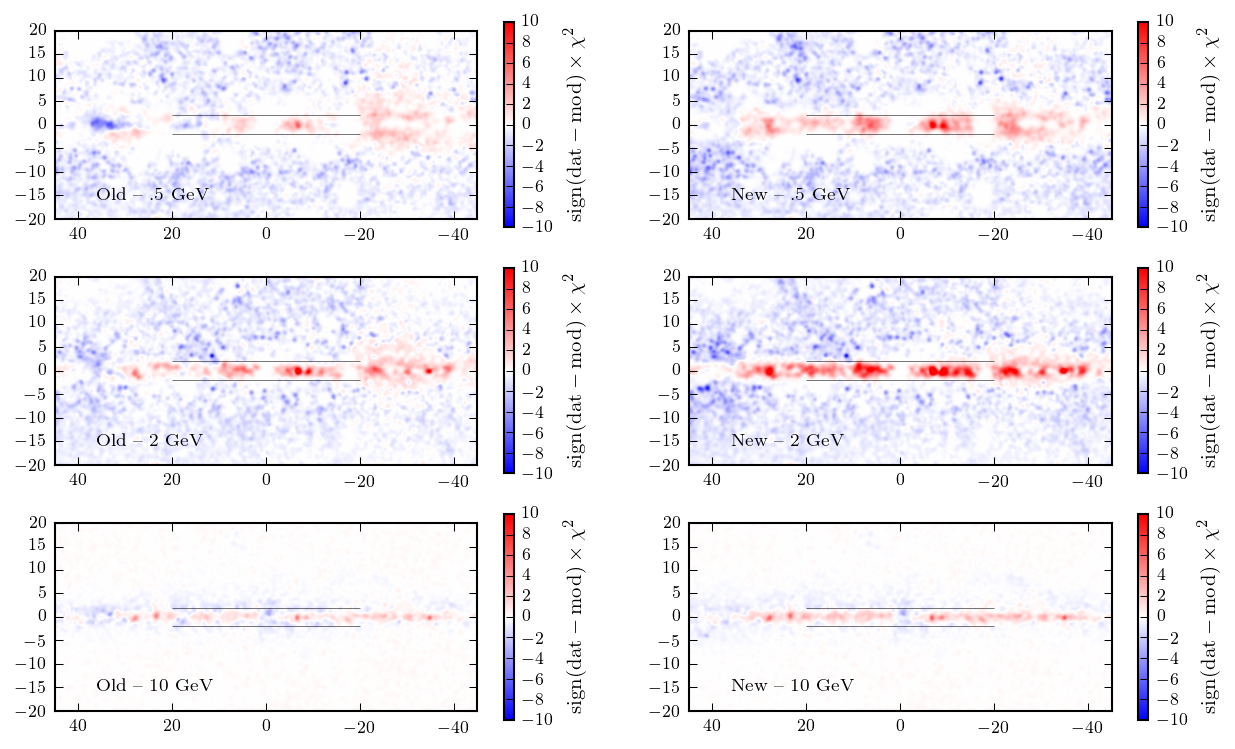

In [32]:
import healpy 
from scipy.ndimage import gaussian_filter as gf
plt.figure(figsize=(10,6))
m1 = healpy.cartview(cs1[3], return_projected_map=True, hold=True, lonra=[-45,45], latra=[-20,20])
m2 = healpy.cartview(cs2[3], return_projected_map=True, hold=True, lonra=[-45,45], latra=[-20,20])
m3 = healpy.cartview(cs1[10], return_projected_map=True, hold=True, lonra=[-45,45], latra=[-20,20])
m4 = healpy.cartview(cs2[10], return_projected_map=True, hold=True, lonra=[-45,45], latra=[-20,20])
m5 = healpy.cartview(cs1[19], return_projected_map=True, hold=True, lonra=[-45,45], latra=[-20,20])
m6 = healpy.cartview(cs2[19], return_projected_map=True, hold=True, lonra=[-45,45], latra=[-20,20])
plt.clf()

vmin, vmax = -10,10

plt.subplot(321)
plt.imshow(gf(m1,3), extent=[-45,45,-20,20], cmap='bwr', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar(label=r'$\rm sign(dat-mod) \times \chi^2$')
plt.text(.1,.1,'Old -- .5 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.hlines(-2,-20,20, linewidth=0.25)
plt.hlines(2,-20,20, linewidth=0.25)
plt.xlim(45,-45)

plt.subplot(322)
#plt.imshow(gf(m2,3), extent=[-45,45,-20,20], norm=matplotlib.colors.SymLogNorm(1e1, vmin=-1.5e5, vmax=1e5), cmap='gist_heat')
plt.imshow(gf(m2,3), extent=[-45,45,-20,20], cmap='bwr', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar(label=r'$\rm sign(dat-mod) \times \chi^2$')
plt.text(.1,.1,'New -- .5 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.hlines(-2,-20,20, linewidth=0.25)
plt.hlines(2,-20,20, linewidth=0.25)
plt.xlim(45,-45)



plt.subplot(323)
plt.imshow(gf(m3,3), extent=[-45,45,-20,20], cmap='bwr', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar(label=r'$\rm sign(dat-mod) \times \chi^2$')
plt.text(.1,.1,'Old -- 2 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.hlines(-2,-20,20, linewidth=0.25)
plt.hlines(2,-20,20, linewidth=0.25)
plt.xlim(45,-45)

plt.subplot(324)
#plt.imshow(gf(m2,3), extent=[-45,45,-20,20], norm=matplotlib.colors.SymLogNorm(1e1, vmin=-1.5e5, vmax=1e5), cmap='gist_heat')
plt.imshow(gf(m4,3), extent=[-45,45,-20,20], cmap='bwr', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar(label=r'$\rm sign(dat-mod) \times \chi^2$')
plt.text(.1,.1,'New -- 2 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.hlines(-2,-20,20, linewidth=0.25)
plt.hlines(2,-20,20, linewidth=0.25)
plt.xlim(45,-45)


plt.subplot(325)
plt.imshow(gf(m5,3), extent=[-45,45,-20,20], cmap='bwr', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar(label=r'$\rm sign(dat-mod) \times \chi^2$')
plt.text(.1,.1,'Old -- 10 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.hlines(-2,-20,20, linewidth=0.25)
plt.hlines(2,-20,20, linewidth=0.25)
plt.xlim(45,-45)

plt.subplot(326)
#plt.imshow(gf(m2,3), extent=[-45,45,-20,20], norm=matplotlib.colors.SymLogNorm(1e1, vmin=-1.5e5, vmax=1e5), cmap='gist_heat')
plt.imshow(gf(m6,3), extent=[-45,45,-20,20], cmap='bwr', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar(label=r'$\rm sign(dat-mod) \times \chi^2$')
plt.text(.1,.1,'New -- 10 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.hlines(-2,-20,20, linewidth=0.25)
plt.hlines(2,-20,20, linewidth=0.25)
plt.xlim(45,-45)


plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/chi2_psc_mask.pdf', bbox_inches='tight')
plt.show()

In [13]:
import copy
def GetResidual(self):
        """
        Obtain the residual by subtracting off the best fit components.

        :return healpixcube: a healpix image of the residuals.
        """
        if not self.fitted:
            raise Exception('No fit run, or template added since last fit. Call "RunLikelihood()"')

        # Start with a copy of the binned photons and iterate through each template.
        residual = copy.copy(self.binned_data).astype(np.float32)
        for key, t in self.templateList.items():
            # Make sure this template has been fit already
            if t.fixSpectrum or t.fixNorm:
                residual -= t.value*t.healpixCube
            else:
                for i_E in range(self.n_bins):
                    residual[i_E] -= t.value[i_E]*t.healpixCube[i_E]

        return residual*self.mask

R1 = GetResidual(A)
R2 = GetResidual(A2)

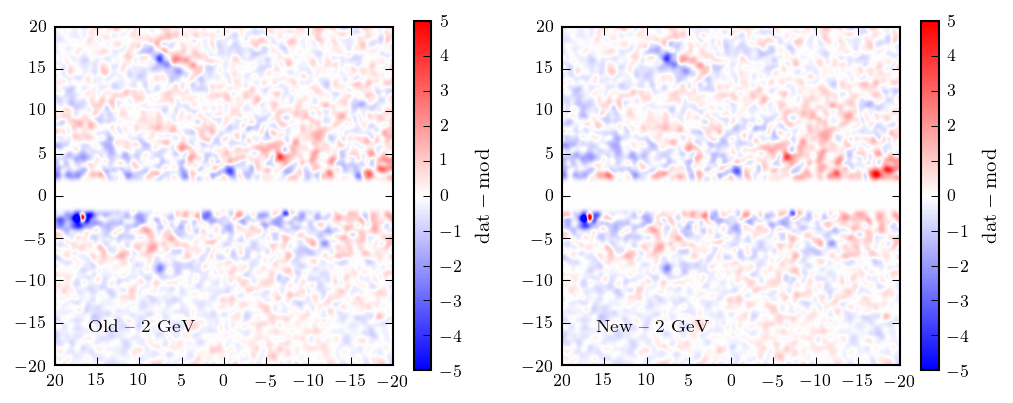

In [21]:
m1 = healpy.cartview(R1[13], return_projected_map=True, hold=True, lonra=[-20,20], latra=[-20,20])
plt.clf()
m2 = healpy.cartview(R2[13], return_projected_map=True, hold=True, lonra=[-20,20], latra=[-20,20])
plt.clf()
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.imshow(gf(m1,6), origin='lower', extent=[-20,20,-20,20], cmap='bwr', vmin=-5,vmax=5)
plt.colorbar(label=r'$\rm dat-mod$')
plt.text(.1,.1,'Old -- 2 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.xlim(20,-20)

plt.subplot(122)
plt.imshow(gf(m2,6), origin='lower', extent=[-20,20,-20,20], cmap='bwr', vmin=-5,vmax=5)
plt.text(.1,.1,'New -- 2 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.colorbar(label=r'$\rm dat-mod$')
plt.xlim(20,-20)

plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/residuals.pdf', bbox_inches='tight')

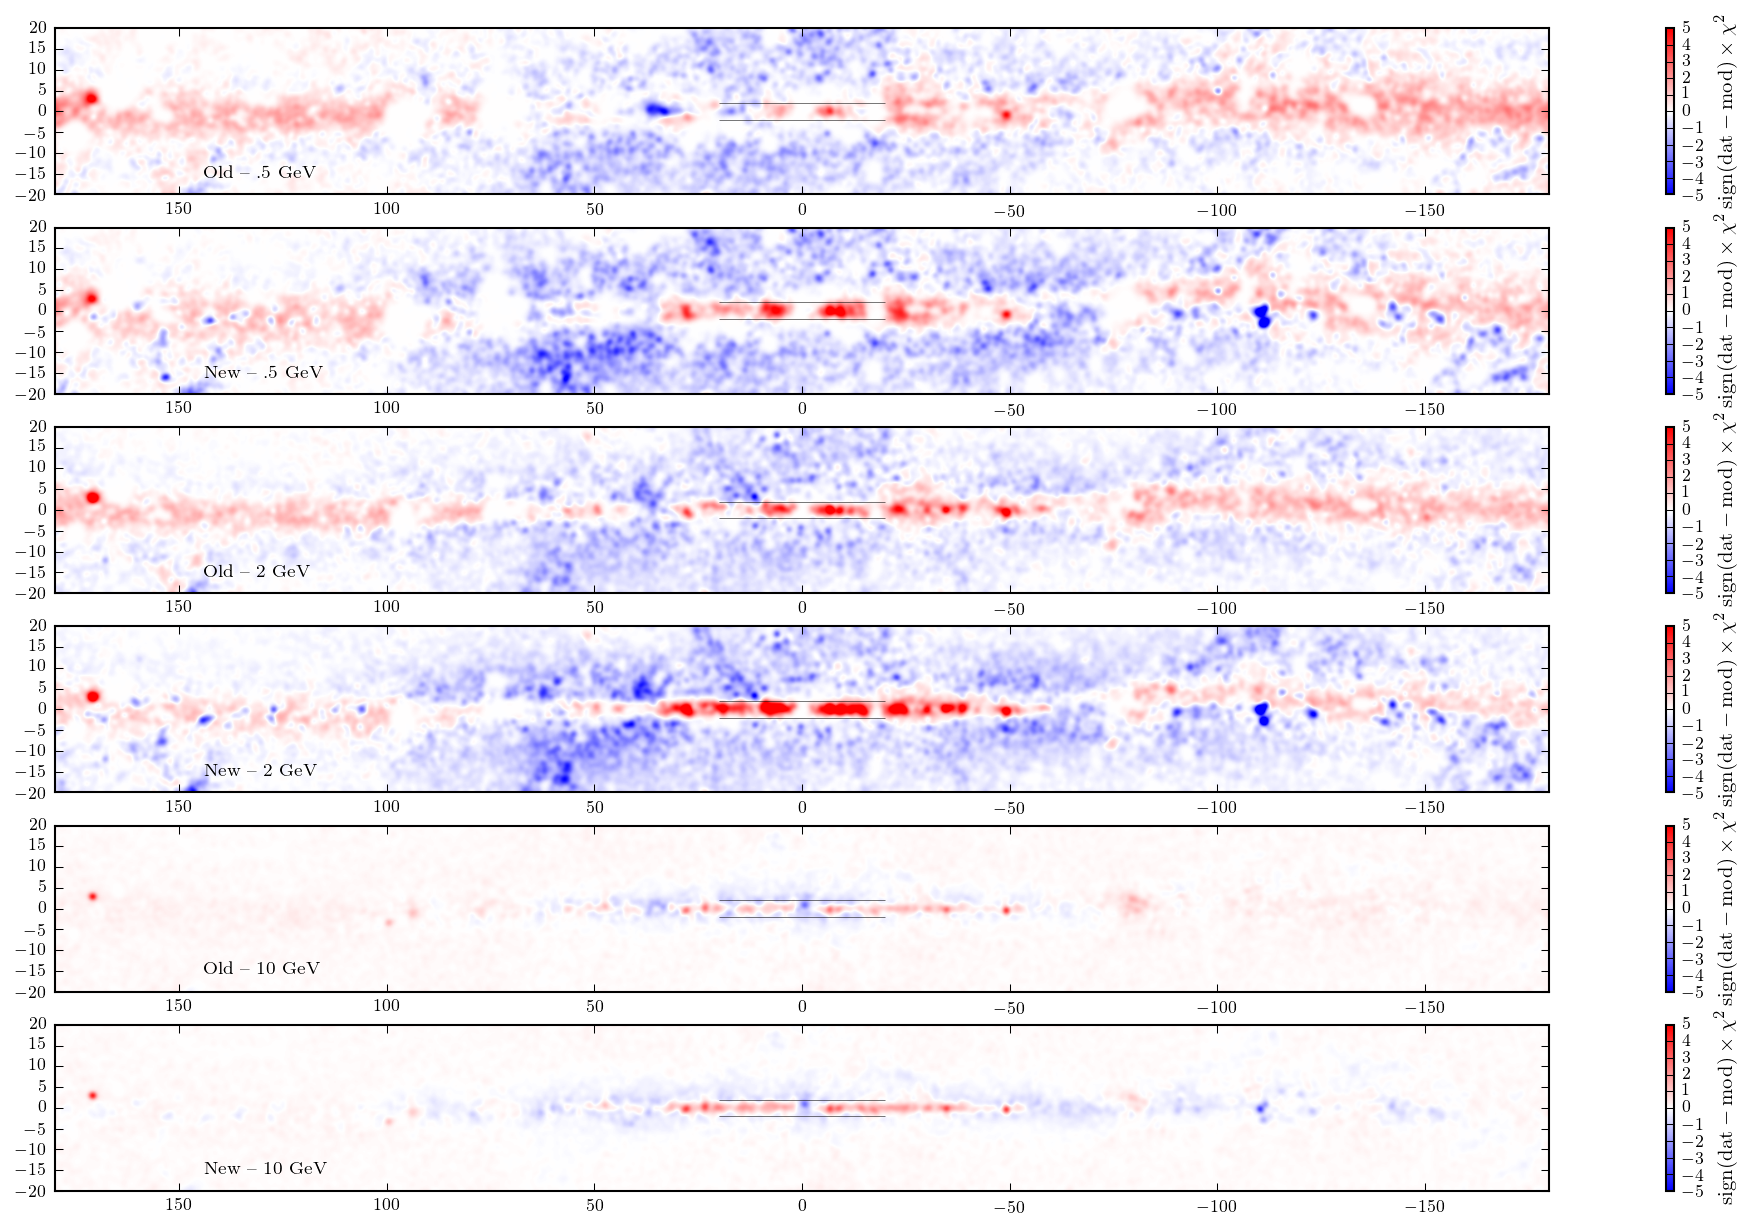

In [30]:
import healpy 
from scipy.ndimage import gaussian_filter as gf
plt.figure(figsize=(20,10))
m1 = healpy.cartview(cs1[3], return_projected_map=True, hold=True, lonra=[-180,180], latra=[-20,20],xsize=1800)
m2 = healpy.cartview(cs2[3], return_projected_map=True, hold=True, lonra=[-180,180], latra=[-20,20],xsize=1800)
m3 = healpy.cartview(cs1[10], return_projected_map=True, hold=True, lonra=[-180,180], latra=[-20,20],xsize=1800)
m4 = healpy.cartview(cs2[10], return_projected_map=True, hold=True, lonra=[-180,180], latra=[-20,20],xsize=1800)
m5 = healpy.cartview(cs1[19], return_projected_map=True, hold=True, lonra=[-180,180], latra=[-20,20],xsize=1800)
m6 = healpy.cartview(cs2[19], return_projected_map=True, hold=True, lonra=[-180,180], latra=[-20,20],xsize=1800)
plt.clf()

vmin, vmax = -5,5

plt.subplot(611)
plt.imshow(gf(m1,3), extent=[-180,180,-20,20], cmap='bwr', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar(label=r'$\rm sign(dat-mod) \times \chi^2$')
plt.text(.1,.1,'Old -- .5 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.hlines(-2,-20,20, linewidth=0.25)
plt.hlines(2,-20,20, linewidth=0.25)
plt.xlim(180,-180)

plt.subplot(612)
#plt.imshow(gf(m2,3), extent=[-45,45,-20,20], norm=matplotlib.colors.SymLogNorm(1e1, vmin=-1.5e5, vmax=1e5), cmap='gist_heat')
plt.imshow(gf(m2,3), extent=[-180,180,-20,20], cmap='bwr', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar(label=r'$\rm sign(dat-mod) \times \chi^2$')
plt.text(.1,.1,'New -- .5 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.hlines(-2,-20,20, linewidth=0.25)
plt.hlines(2,-20,20, linewidth=0.25)
plt.xlim(180,-180)



plt.subplot(613)
plt.imshow(gf(m3,3), extent=[-180,180,-20,20], cmap='bwr', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar(label=r'$\rm sign(dat-mod) \times \chi^2$')
plt.text(.1,.1,'Old -- 2 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.hlines(-2,-20,20, linewidth=0.25)
plt.hlines(2,-20,20, linewidth=0.25)
plt.xlim(180,-180)

plt.subplot(614)
#plt.imshow(gf(m2,3), extent=[-45,45,-20,20], norm=matplotlib.colors.SymLogNorm(1e1, vmin=-1.5e5, vmax=1e5), cmap='gist_heat')
plt.imshow(gf(m4,3), extent=[-180,180,-20,20], cmap='bwr', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar(label=r'$\rm sign(dat-mod) \times \chi^2$')
plt.text(.1,.1,'New -- 2 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.hlines(-2,-20,20, linewidth=0.25)
plt.hlines(2,-20,20, linewidth=0.25)
plt.xlim(180,-180)


plt.subplot(615)
plt.imshow(gf(m5,3), extent=[-180,180,-20,20], cmap='bwr', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar(label=r'$\rm sign(dat-mod) \times \chi^2$')
plt.text(.1,.1,'Old -- 10 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.hlines(-2,-20,20, linewidth=0.25)
plt.hlines(2,-20,20, linewidth=0.25)
plt.xlim(180,-180)

plt.subplot(616)
#plt.imshow(gf(m2,3), extent=[-45,45,-20,20], norm=matplotlib.colors.SymLogNorm(1e1, vmin=-1.5e5, vmax=1e5), cmap='gist_heat')
plt.imshow(gf(m6,3), extent=[-180,180,-20,20], cmap='bwr', vmin=vmin, vmax=vmax, origin='lower')
plt.colorbar(label=r'$\rm sign(dat-mod) \times \chi^2$')
plt.text(.1,.1,'New -- 10 GeV', transform=plt.gca().transAxes, fontsize=9)
plt.hlines(-2,-20,20, linewidth=0.25)
plt.hlines(2,-20,20, linewidth=0.25)
plt.xlim(180,-180)


plt.savefig('/home/carlson/Dropbox/plots/GCE_sys/chi2_full_plane.pdf', bbox_inches='tight')